# 1. 감성 분석(Sentiment Analysis)

__`감성 분석(Sentiment Anaylsis)`__ 는 문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법이다. 감성 분석은 문서 내 텍스트가 나타내는 여러가지 주관적인 단어와 문맥을 기반으로 __감성(Sentiment)__ 수치를 계산하는 방법을 이용한다.  
이러한 감성 지수는 긍정 감성 지수와 부정 감성 지수로 구성되며 이들 지수를 합산해 긍정 감성 or 부정 감성을 결정한다.  

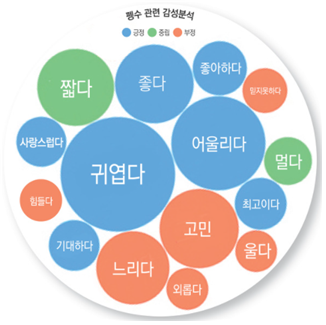

아래의 예시를 살펴보자.  

_Honda Accords and Toyota Camrys are nice sedans. (혼다 어코드와 도유타 캠리는 좋은 세단이다_  

위 문장은 혼다와 도요타의 차종 각각에 대해서 긍정을 나타내고 있다. 하지만 추가적인 내용이 붙었을 때 이들에 대한 평가가 달라지는 경우도 있다. 아래의 문장을 보자.  

_Honda Accords and Toyota Camrys are nice sedans, but hardly the best car on the road. (혼다 어코드와 도요타 캠리는 좋은 세단이지만,도로에서 가장 좋은 차는 아니다.)”_  

위와 같은 추가 설명이 붙는다면 위 문장은 대상에 대해 긍정을 표하고자 하는 문장인지, 부정을 표하고자 하는 문장인지 파악하기 매우 어려워진다. 이러한 언어의 모호성은 감성 분석을 어렵게 하는 원인이다.  


감성 분석이 사용되는 곳은 다양하다. 기업 내부적으로는 고객 피드백, 콜센터 메시지 등과 같은 데이터를 분석하며 외부적으로는 기업과 관련된 뉴스나 SNS 홍보물 등에 달린 댓글의 긍/부정을 판단하는 곳에 사용되고 있다. 개인 단위에서는 영화를 보기 전에 리뷰를 참고하는 것과 같이 특정 제품이나 서비스를 이용할 지를 결정하는 데에 사용할 수 있다. 이외에도 광고의 효율을 높이거나 특정 약품이 사람들에게 실제로 효과가 있는 지를 알아보는 데에도 사용할 수 있다.

감성 분석은 머신러닝 관점에서 `지도학습`과 `비지도학습` 으로 나뉜다.  

* __`지도학습`__ : 학습 데이터와 타겟 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일하다.  


* __`비지도학습`__ : `Lexicon` 이라는 일종의 __감성 어휘 사전__ 을 이용한다. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단한다.

감성분석에 대한 자세한 내용은 딥러닝 개념을 공부한 후 추가로 포스팅 하겠다.

## 1) 지도학습 기반 감성 분석 실습 - IMDB 영화평

In [1]:
import pandas as pd

review_df = pd.read_csv('data_set/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [2]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

HTML 형식에서 추출해 `<br/>` 태그가 여전히 존재한다. `<br/>` 문자열은 피쳐로 만들 필요가 없으니 삭제하도록 하자. `replace()`를 사용하여 `<br/>` 태그를 공백으로 모두 바꾸자.  

또한 영어가 아닌 숫자/특수문자 역시 Sentiment를 위한 피쳐로는 의미가 없어 보이기 때문에 모두 공란으로 바꾸자.

In [3]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

결정값 클래스인 sentiment 칼럼을 별도로 추출해 결정 값 데이터 세트를 만들고, 원본 데이터 세트에서 id와 sentiment 칼럼을 삭제해 피쳐 데이터 세트를 생성하자.

In [4]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

CountVectorizer 벡터화를 적용하여 간단하게 LogisticRegression 모델을 피팅해보자.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.  
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

C:\Users\jinho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도는 0.8860, ROC-AUC는 0.9503


이번에는 TF-IDF 벡터화를 적용해 다시 예측 성능을 측정해보자.

In [6]:
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


## 2) 비지도학습 기반 감성 분석

비지도학습은 __`Lexicon`__ 을 기반으로 하는 것이다. 많은 감성 분석용 데이터는 결정된 레이블 값을 가지고 있지 않기 때문에 Lexicon은 유용하게 사용될 수 있다.(한글을 지원하는 Lexicon은 없다.)  

Lexicon은 일반적으로 어휘사전을 의미하지만, 여기서는 주로 감성분석만을 위해 지원하는 감성 어휘 사전이다. 감성 사전은 긍정(Positive) 혹은 부정(Negative) 감성의 정도를 의미하는 수치를 가지고 있으며 이를 감성 지수(Polarity score)라고 한다. 이 감성 지수는 단어의 위치나 주변 단어, 문맥, POS(Part of Speech) 등을 참고해 결정된다.

NLP에서 제공하는 __`WordNet`__ 모듈은 방대한 영어 어휘 사전이다. WordNet은 단순한 어휘 사전이 아닌 __시맨틱 분석__ 을 제공하는 어휘 사전이다.  

아마 텍스트 분석을 하면서 __시멘틱(semantic)__ 이라는 단어를 많이 접할 것이다. 시멘틱은 `문맥상 의미`이다. NLP 패키지는 시맨틱을 프로그램적으로 인터페이스할 수 있는 다양한 방법을 제공한다.  

이처럼 WordNet은 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공하며, 이를 위해 각각의 품사로 구성된 개별 단어를 __`Synset(Sets of cognitive synonyms)`__ 이라는 개념을 이용해 표현한다. Synset은 단순한 하나의 단어가 아니라 그 단어가 가지는 문맥, 시맨틱 정보를 제공하는 WordNet의 핵심 개념이다.  

NLTK의 감성 사전이 감성에 대한 훌륭한 사전 역할을 제공한 장점은 인정해야 하겠지만, 예측 성능을 그렇게 뛰어나지 못하다. 때문에 실제 업무 적용은 NLTK 패키지가 아닌 다른 감성 사전을 적용하는 것이 일반적이다.  

다음은 NLTK를 포함한 대표적인 감성 사전이다.  

* __`SentiWordNet`__ : NLTK 패키지의 WordNet과 유사하게 감성 단어 전용의 WordNet을 구현한 것이다. WordNet의 Synset 개념을 감성 분석에 적용한 것이다. WordNet의 Synset별로 3가지 감성 점수(sentiment score)를 할당한다.  
단어들의 긍정, 부정 감성 지수를 합산하여 최종 감성지수를 계산하고 이에 기반해 감성이 긍정인지 부정인지 결정  
> - 긍정 감성 지수 : 해당 단어가 감성적으로 얼마나 긍정적인가  
> - 부정 감성 지수 : 해당 단어가 감성적으로 얼마나 부정적인가  
> - 객관성 지수 : 긍정/부정 감성 지수와 완전히 반대되는 개념으로 단어가 감성과 관계없이 얼마나 객관적인지를 수치로 나타낸 것.  


* __`VADER`__ : 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지. 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용되는 패키지.  


* __`Pattern`__ : 예측 성능 측면에서 가장 주목받는 패키지. 파이썬 2.X 버전에서만 사용 가능

## 3) SentiWordNet을 이용한 감성 분석

### WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

In [7]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성. 
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets), '\n')
print('synsets() 반환 값 갯수:', len(synsets), '\n')
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'> 

synsets() 반환 값 갯수: 18 

synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


`synsets() 반환 값` 의 첫번 째 결과를 보면 `'present.n.01`가 출력되었다. 이는 present는 의미, n은 명사 품사, 01은 present가 명사로서 가지는 의미가 여러가지 있기 때문에 이를 구분하는 인덱스이다.

synsets에서 present 출력값에 해당하는 의미들을 알아보자.

In [8]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####') # Synset 출력 값
    print('POS :',synset.lexname()) # 품사
    print('Definition:',synset.definition()) # 의미
    print('Lemmas:',synset.lemma_names(), '\n') # 부명제

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays'] 

##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present'] 

##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense'] 

##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate'] 

##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out'] 

##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present',

WordNet은 어떤 어휘와 다른 어휘 간의 관계를 유사도로 나타낼 수 있다.

In [9]:
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다. 
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.  
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


SentiWordNet 에서도 살펴보자.

In [10]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 갯수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


`Senti_synset` 객체는 위에서 언급했듯, 단어의 감성을 나타내는 감성 지수와 객관성을 나타내는 객관성 지수를 가진다. 어떤 단어가 전혀 감성적이지 않으면 객관성 지수는 1이 되고, 감성 지수는 모두 0이 된다.

In [11]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score(), '\n')

fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0 

fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


정리하면 다음과 같이 이해하면 쉽다.  

* __`WordNet - Synset`__ : 해당 단어의 문맥상 의미를 파악하기 위함.  

* __`SentiWordnet - SentiSynset`__ : 해당 단어의 긍/부정 감성, 객관성을 파악하기 위함  


### SentiWordNet을 이용한 영화 감상폄 감성 분석

SentiWordNet을 이용해 감성 분석을 수행하는 순서는 다음과 같다.  

1. 문서를 문장 단위로 분해  
2. 문장을 단어 단위로 토큰화하고 품사 태깅  
3. 품사 태깅된 단어 기반으로 `synset` 객체와 `senti_synset` 객체를 생성  
4. `Senti_synset`에서 긍정/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

In [12]:
# 품사 태깅하는 함수 생성

from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

In [13]:
# 전체 감성 지수를 합산하여 평가하는 함수 생성

from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

앞선 IMDB 감상평 개별 문서에 적용하여 긍정, 부정 감성을 예측해보자.

In [14]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [15]:
review_df

,id,sentiment,review,preds
0,"""5814_8""",1,With all this stuff going down at the moment ...,0
1,"""2381_9""",1,The Classic War of the Worlds by Timothy ...,1
2,"""7759_3""",0,The film starts with a manager Nicholas Bell...,0
3,"""3630_4""",0,It must be assumed that those who praised thi...,0
4,"""9495_8""",1,Superbly trashy and wondrously unpretentious ...,0
...,...,...,...,...
24995,"""3453_3""",0,It seems like more consideration has gone int...,0
24996,"""5064_1""",0,I don t believe they made this film Complete...,1
24997,"""10905_3""",0,Guy is a loser Can t get girls needs to bui...,1
24998,"""10194_3""",0,This minute documentary Bu uel made in the...,0


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [17]:
print('#### SentiWordNet 예측 성능 평가 ####')
get_clf_eval(y_target, preds)

#### SentiWordNet 예측 성능 평가 ####
오차 행렬
[[7668 4832]
 [3636 8864]]
정확도: 0.6613, 정밀도: 0.6472, 재현율: 0.7091,    F1: 0.6767, AUC:0.6613


### VADER을 이용한 감성 분석

__`VADER`__ 은 앞서 밝혔듯, 소셜 미디어 분석에 특화된 룰 기반의 Lexicon이다.   

VADER의 간단한 사용법을 알아보자.

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.119, 'neu': 0.755, 'pos': 0.126, 'compound': -0.0678}


`SentimentIntensityAnalyzer` 객체를 생성한 뒤 문서별로 `polarity_scores()` 메서드를 호출해 감성 점수를 구한 뒤, 해당 문서의 감정 점수를 임계값을 기준으로 긍정,부정으로 분류하여 최종 측정한다.  

출력값 해석은 다음과 같다.  
`neg` 는 부정 감성 지수, `new`는 중립적인 감성 지수, `pos`는 긍정 감성 지수, 그리고 `compound`는 셋을 적절히 조합하여 -1과 1사이의 감성 지수를 표현한 값이다.  
최종적으로 compound score를 기반으로 긍정,부정 감성 지수를 최종 판단한다.  
일반적으로 0.1이상아면 긍정으로 판단하지만, 임계값을 임의로 잘 조절하여 예측 성능을 조절하기도 한다.

In [19]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print('#### VADER 예측 성능 평가 ####')
get_clf_eval(y_target, vader_preds)

#### VADER 예측 성능 평가 ####
오차 행렬
[[ 6729  5771]
 [ 1858 10642]]
정확도: 0.6948, 정밀도: 0.6484, 재현율: 0.8514,    F1: 0.7361, AUC:0.6948


# 2. 토픽 모델링(Topic Modeling) - 20 뉴스 그룹

__`토픽 모델링(Topic Modeling)`__ 이란 문서 집합에 숨어 있는 주제를 찾는 것이다. 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.  

머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 __`LSA(Latent Semantic Analysis)`__ 와 __`LDA(Latent Dirichlet Allocation)`__ 이다.  
토픽 모델링에 사용되는 LDA는 차원축소에서 배운 특이값 분해(LDA)와는 다른 알고리즘이기 때문에 이점 유의하고 사용해야한다.

In [47]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


CountVectorizer를 적용한 변수는 총 7862개의 문서가 1000개의 피쳐로 구성된 행렬 데이터이다.  
이렇게 피쳐 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행해보자.  

토픽의 개수는 8개로 동일하게 지정하겠다.

In [48]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

`LatentDirichletAllocation`를 구생하면 LatentDirichletAllocation는 components_ 파라미터를 갖는다. 이는 개별 토픽별로 각 word 피쳐가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있다. 높은 값일수록 해당 word 피쳐는 그 토픽의 중심 word가 된다.  

결과를 보면 8개의 토픽별로 1000개의 word 피쳐가 해당 토픽별 연관도 값을 가지고 있다.

그럼 각 토픽 별 어떤 단어가 중요한지 알아보자.

In [49]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


# 3. 문서 군집화

__`문서 군집화(Document Clustering)`__ 은 비슷한 텍스트 구성의 문서를 군집화(Clustering) 하는 것이다. 문서 군집화는 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 앞에서 소개한 텍스트 분류 기반의 문서 분류와 유사하다.  

하지만 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한 반면, 문서 군집화는 비지도학습이기 때문에 학습 데이터 세트가 필요없다는 차이점이 있다.

In [34]:
import pandas as pd
import glob ,os

# 아래는 제 컴퓨터에서 압축 파일을 풀어 놓은 디렉토리이니, 여러분의 디렉토리를 설정해 주십시요  
path = r'C:\Users\jinho\Desktop\진호\국민대\ML_Study\data_set\OpinosisDataset1.0\OpinosisDataset1.0\topics'                     
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...


In [6]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

C:\Users\jinho\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [8]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [9]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
1,bathroom_bestwestern_hotel_sfo,...,1
2,battery-life_amazon_kindle,...,3
3,battery-life_ipod_nano_8gb,...,3
4,battery-life_netbook_1005ha,...,3


In [10]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
8,directions_garmin_nuvi_255W_gps,...,0
9,display_garmin_nuvi_255W_gps,...,0
33,satellite_garmin_nuvi_255W_gps,...,0
34,screen_garmin_nuvi_255W_gps,...,0
43,speed_garmin_nuvi_255W_gps,...,0
47,transmission_toyota_camry_2007,...,0
48,updates_garmin_nuvi_255W_gps,...,0


In [11]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,1
13,food_holiday_inn_london,...,1
14,food_swissotel_chicago,...,1
15,free_bestwestern_hotel_sfo,...,1
20,location_bestwestern_hotel_sfo,...,1
21,location_holiday_inn_london,...,1
24,parking_bestwestern_hotel_sfo,...,1
28,price_holiday_inn_london,...,1
32,room_holiday_inn_london,...,1
30,rooms_bestwestern_hotel_sfo,...,1


In [12]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,2
7,comfort_toyota_camry_2007,...,2
16,gas_mileage_toyota_camry_2007,...,2
17,interior_honda_accord_2008,...,2
18,interior_toyota_camry_2007,...,2
22,mileage_honda_accord_2008,...,2
25,performance_honda_accord_2008,...,2
29,quality_toyota_camry_2007,...,2
37,seats_honda_accord_2008,...,2


In [13]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,...,3
3,battery-life_ipod_nano_8gb,...,3
4,battery-life_netbook_1005ha,...,3
26,performance_netbook_1005ha,...,3
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,3
49,video_ipod_nano_8gb,...,3


In [14]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
5,buttons_amazon_kindle,...,4
10,eyesight-issues_amazon_kindle,...,4
11,features_windows7,...,4
12,fonts_amazon_kindle,...,4
19,keyboard_netbook_1005ha,...,4
23,navigation_amazon_kindle,...,4
27,price_amazon_kindle,...,4
35,screen_ipod_nano_8gb,...,4
36,screen_netbook_1005ha,...,4
41,size_asus_netbook_1005ha,...,4


In [15]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
48,updates_garmin_nuvi_255W_gps,...,0
44,speed_windows7,...,0
43,speed_garmin_nuvi_255W_gps,...,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0
41,size_asus_netbook_1005ha,...,0
36,screen_netbook_1005ha,...,0
35,screen_ipod_nano_8gb,...,0
34,screen_garmin_nuvi_255W_gps,...,0
33,satellite_garmin_nuvi_255W_gps,...,0


In [16]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


In [17]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [18]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [19]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'parking_bestwestern_hotel_sfo']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_hon